In [25]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
pi=3.14159265358979
plt.rcParams["figure.facecolor"] = "white"

In [26]:
sp = 50
init_angles = np.linspace(0, 3.14, sp)
print(init_angles)

[0.         0.06408163 0.12816327 0.1922449  0.25632653 0.32040816
 0.3844898  0.44857143 0.51265306 0.57673469 0.64081633 0.70489796
 0.76897959 0.83306122 0.89714286 0.96122449 1.02530612 1.08938776
 1.15346939 1.21755102 1.28163265 1.34571429 1.40979592 1.47387755
 1.53795918 1.60204082 1.66612245 1.73020408 1.79428571 1.85836735
 1.92244898 1.98653061 2.05061224 2.11469388 2.17877551 2.24285714
 2.30693878 2.37102041 2.43510204 2.49918367 2.56326531 2.62734694
 2.69142857 2.7555102  2.81959184 2.88367347 2.9477551  3.01183673
 3.07591837 3.14      ]


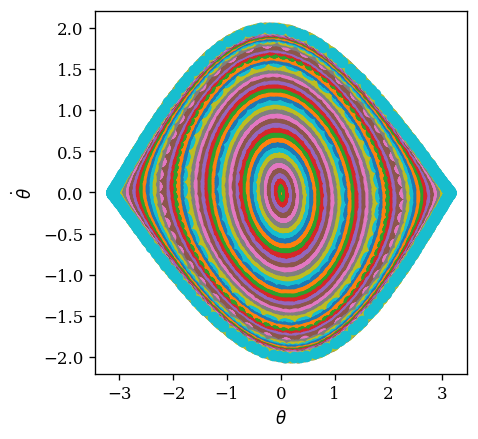

In [27]:
#import numpy as np
#%matplotlib inline
#import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'
plt.rcParams["figure.facecolor"] = "white"

#init_angles = np.linspace(0,6,10)

g = 1
l = 1

_,ax=plt.subplots(1,1,figsize=(4,4))
for angle in init_angles:

    thetas = []
    theta_dots = []

    theta = angle
    theta_dot = 0

    sp_t = 500 #number of time steps (spacing in time)
    end_t = 100
    
    for t in np.linspace(0, end_t, sp_t):
        theta = theta % (2*pi)
        if theta > pi:
            theta -= 2*pi
        #pretty plot
            
        thetas.append(theta )
        theta_dots.append(theta_dot)

        theta = ( theta + (end_t/sp_t) * theta_dot )
                    
        theta_dot = theta_dot - (end_t/sp_t)*(g/l) * np.sin(theta) #physical pendulum
        #theta_dot = theta_dot - (end_t/sp_t)*(g/l)*theta #harmonic oscillator
    ax.scatter(thetas,theta_dots)    
        
ax.set_xlabel(r'$\theta$'); ax.set_ylabel(r'$\dot{\theta}$')
plt.show()

[0.         0.06408163 0.12816327 0.1922449  0.25632653 0.32040816
 0.3844898  0.44857143 0.51265306 0.57673469 0.64081633 0.70489796
 0.76897959 0.83306122 0.89714286 0.96122449 1.02530612 1.08938776
 1.15346939 1.21755102 1.28163265 1.34571429 1.40979592 1.47387755
 1.53795918 1.60204082 1.66612245 1.73020408 1.79428571 1.85836735
 1.92244898 1.98653061 2.05061224 2.11469388 2.17877551 2.24285714
 2.30693878 2.37102041 2.43510204 2.49918367 2.56326531 2.62734694
 2.69142857 2.7555102  2.81959184 2.88367347 2.9477551  3.01183673
 3.07591837 3.14      ]


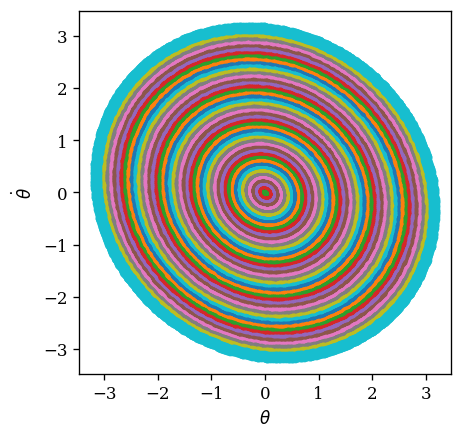

In [28]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'
plt.rcParams["figure.facecolor"] = "white"

#init_angles = np.linspace(0,6,10)
print(init_angles)

g = 1
l = 1

_,ax=plt.subplots(1,1,figsize=(4,4))
for angle in init_angles:

    thetas = []
    theta_dots = []

    theta = angle
    theta_dot = 0

    sp_t = 500 #number of time steps (spacing in time)
    end_t = 100
    
    for t in np.linspace(0, end_t, sp_t):
        thetas.append(theta)
        theta_dots.append(theta_dot)

        theta = ( theta + (end_t/sp_t) * theta_dot ) #% (2*pi) #can't do modulo 2pi because
        #these dynamics are really like a brick hanging on a spring (a true harmonic oscillator)
        #taking mod 2pi of the displacement there is nonsensical; likewise it is here 
        #only a good approximation for small theta anyway
        
        #theta_dot = theta_dot - (end_t/sp_t)*(g/l) * np.sin(theta) #physical pendulum
        theta_dot = theta_dot - (end_t/sp_t)*(g/l)*(theta) #harmonic oscillator
    ax.scatter(thetas,theta_dots)    
        
ax.set_xlabel(r'$\theta$'); ax.set_ylabel(r'$\dot{\theta}$')
plt.show()

Why are these phase-space loops skewed?

The first numerical knob I thought to turn was the granularity in time- the number of time steps used in calculating each pendulum (different in their initial angles) over a set period of time. Increasing this number would typically mean more accurate simulation.

Let's increase the number of time steps by an order of magnitude.

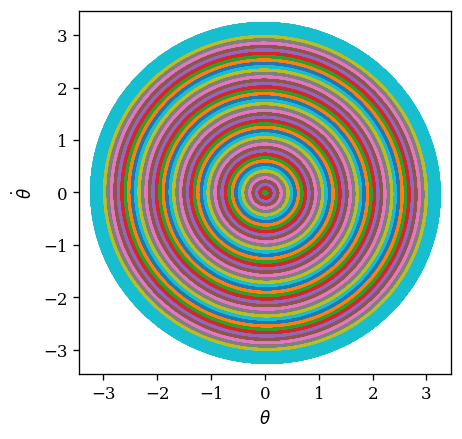

In [30]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'
plt.rcParams["figure.facecolor"] = "white"

#init_angles = np.linspace(0,6,10)

g = 1
l = 1

_,ax=plt.subplots(1,1,figsize=(4,4))
for angle in init_angles:

    thetas = []
    theta_dots = []

    theta = angle
    theta_dot = 0

    sp_t = 5000 #number of time steps (spacing in time)
    #increase timesteps by order of magnitude
    #to attempt to rid phase space diagram of hopefully numerical-approximation-resultant skewing
    end_t = 100
    
    for t in np.linspace(0, end_t, sp_t):
        thetas.append(theta)
        theta_dots.append(theta_dot)

        theta = ( theta + (end_t/sp_t) * theta_dot ) #% (2*pi) #can't do modulo 2pi because
        #these dynamics are really like a brick hanging on a spring (a true harmonic oscillator)
        #taking mod 2pi of the displacement there is nonsensical; likewise it is here 
        #only a good approximation for small theta anyway
        
        #theta_dot = theta_dot - (end_t/sp_t)*(g/l) * np.sin(theta) #physical pendulum
        theta_dot = theta_dot - (end_t/sp_t)*(g/l)*(theta) #harmonic oscillator
    ax.scatter(thetas,theta_dots)    
        
ax.set_xlabel(r'$\theta$'); ax.set_ylabel(r'$\dot{\theta}$')
plt.show()

It worked!

I have just noticed that the initial physical pendulum phase space diagram is also skewed. Let us see if making the time steps smaller, as I did with the harmonic oscillator, will remedy this.

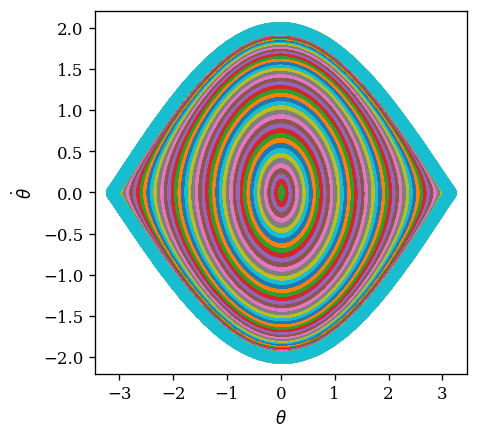

In [34]:
#import numpy as np
#%matplotlib inline
#import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'
plt.rcParams["figure.facecolor"] = "white"

#init_angles = np.linspace(0,6,10)

g = 1
l = 1

_,ax=plt.subplots(1,1,figsize=(4,4))
for angle in init_angles:

    thetas = []
    theta_dots = []

    theta = angle
    theta_dot = 0

    sp_t = 5000 #number of time steps (spacing in time)
    end_t = 100
    
    for t in np.linspace(0, end_t, sp_t):
        theta = theta % (2*pi)
        if theta > pi:
            theta -= 2*pi
        #pretty plot
            
        thetas.append(theta )
        theta_dots.append(theta_dot)

        theta = ( theta + (end_t/sp_t) * theta_dot )
                    
        theta_dot = theta_dot - (end_t/sp_t)*(g/l) * np.sin(theta) #physical pendulum
        #theta_dot = theta_dot - (end_t/sp_t)*(g/l)*theta #harmonic oscillator
    ax.scatter(thetas,theta_dots)    
        
ax.set_xlabel(r'$\theta$'); ax.set_ylabel(r'$\dot{\theta}$')
plt.show()

Looks alright to me.

My curiosity -- which *is* the only purpose of this notebook -- is telling me to make some plots of theta vs. time.

(I'm changing the amount of time from 100 (time units...) to 60 so the lines aren't super dense to look at. But the amount of time steps is the same. So I'm decreasing the size of a time step. I think it should be fine because I have established that I'm already at a point where the phase space diagrams look 'right.')

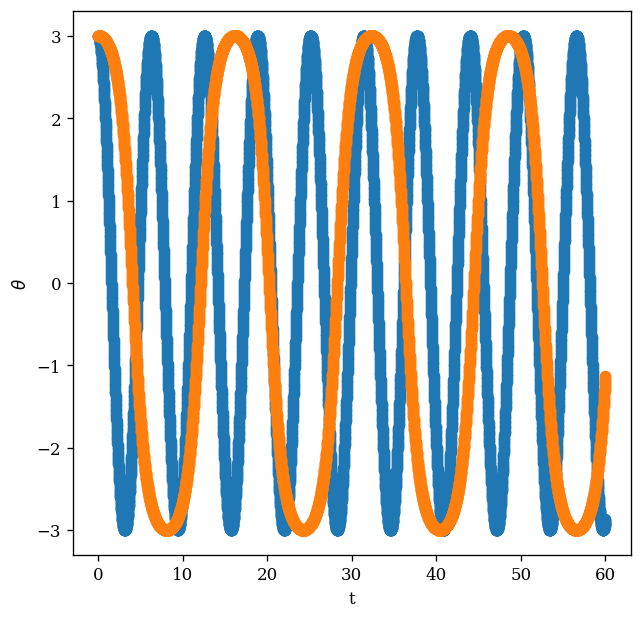

In [81]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family']  ='serif'
plt.rcParams['figure.facecolor'] = 'white'
#plt.rcParams['lines.linestyle'] = '--'
#plt.rcParams['lines.linewidth']= 0.01

g = 1 
l = 1

#_, ax = plt.subplots(3,3, figsize=(4,4))
_, ax = plt.subplots(1,1, figsize=(6,6))

#init_angles = np.linspace(0, 6, 9)


for angle in [3]:#init_angles:

    thetas_phys = []
    thetas_harm = []
    theta_dots_phys = []
    theta_dots_harm = []
    ts = []

    theta_phys = angle
    theta_harm = angle
    theta_dot_phys = 0
    theta_dot_harm = 0

    sp_t = 5000 #number of time steps (spacing in time)
    end_t = 60
    
    for t in np.linspace(0, end_t, sp_t):
        
        theta_phys = theta_phys % (2*pi)
        if theta_phys > pi:
            theta_phys -= 2*pi
        
        theta_harm = theta_harm % (2*pi)
        if theta_harm > pi:
            theta_harm -= 2*pi
        #pretty plot
            
        
        ts.append(t)
        thetas_phys.append(theta_phys)
        thetas_harm.append(theta_harm)
        theta_dots_phys.append(theta_dot_phys)
        theta_dots_harm.append(theta_dot_harm)

        theta_phys = ( theta_phys + (end_t/sp_t) * theta_dot_phys )
        theta_harm = ( theta_harm + (end_t/sp_t) * theta_dot_harm )
                    
        theta_dot_phys = theta_dot_phys - (end_t/sp_t)*(g/l) * np.sin(theta_phys) #physical pendulum
        theta_dot_harm = theta_dot_harm - (end_t/sp_t)*(g/l)*theta_harm #harmonic oscillator
    ax.scatter(ts, thetas_harm)
    ax.scatter(ts, thetas_phys)
    ax.set_xlabel(r't'); ax.set_ylabel(r'$\theta$')
    

Initially, I had set the initial angle to pi. This was a silly first step to make. I will show that next, but first, an interpretation of what we have here. 

Initial angle of 3 radians. Close to pi, which would be the pendulum bob pointed straight up; in that case, both situations would have it stay there forever, balanced perfectly. More on that later.

It appears the the physical pendulum (orange line) is slower than the harmonic oscillator (blue line) by a factor of 2 or 3. That is interesting. I wasn't sure what to make of that at first. I'll get to that in a second.

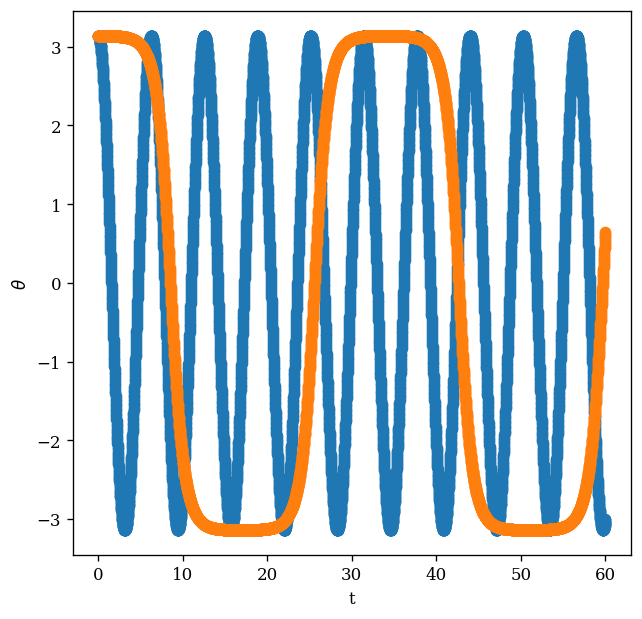

In [82]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family']  ='serif'
plt.rcParams['figure.facecolor'] = 'white'
#plt.rcParams['lines.linestyle'] = '--'
#plt.rcParams['lines.linewidth']= 0.01

g = 1 
l = 1

#_, ax = plt.subplots(3,3, figsize=(4,4))
_, ax = plt.subplots(1,1, figsize=(6,6))

#init_angles = np.linspace(0, 6, 9)


for angle in [3.14]:#init_angles:

    thetas_phys = []
    thetas_harm = []
    theta_dots_phys = []
    theta_dots_harm = []
    ts = []

    theta_phys = angle
    theta_harm = angle
    theta_dot_phys = 0
    theta_dot_harm = 0

    sp_t = 5000 #number of time steps (spacing in time)
    end_t = 60
    
    for t in np.linspace(0, end_t, sp_t):
        
        theta_phys = theta_phys % (2*pi)
        if theta_phys > pi:
            theta_phys -= 2*pi
        
        theta_harm = theta_harm % (2*pi)
        if theta_harm > pi:
            theta_harm -= 2*pi
        #pretty plot
            
        
        ts.append(t)
        thetas_phys.append(theta_phys)
        thetas_harm.append(theta_harm)
        theta_dots_phys.append(theta_dot_phys)
        theta_dots_harm.append(theta_dot_harm)

        theta_phys = ( theta_phys + (end_t/sp_t) * theta_dot_phys )
        theta_harm = ( theta_harm + (end_t/sp_t) * theta_dot_harm )
                    
        theta_dot_phys = theta_dot_phys - (end_t/sp_t)*(g/l) * np.sin(theta_phys) #physical pendulum
        theta_dot_harm = theta_dot_harm - (end_t/sp_t)*(g/l)*theta_harm #harmonic oscillator
    ax.scatter(ts, thetas_harm)
    ax.scatter(ts, thetas_phys)
    ax.set_xlabel(r't'); ax.set_ylabel(r'$\theta$')
    

PLEASE NOTE that the initial angle is NOT pi, but instead 3.14.

This comparison plot, between the harmonic oscillator approximation of the pendulum and the physical pendulum itself, initially confused me a good deal.

The wider, orange line, with long horizontal troughs, is the physical pendulum. I find it quite neat that the troughs are there. The troughs mean that when it reaches the highest points of its swing, it stays there for longer than if it were a true harmonic oscillator. Imagine a pendulum started almost vertically. When it reaches the other end of its swing, it is again almost vertical, and it takes a while for it to turn around.


Comparing this to a block bouncing on a spring, my intuition agrees. The blue line, with small troughs, is the approximation - a 1-dimensional harmonic oscillator will trace out a sine wave in time-- again, like a mass on a spring.
However, note the conditions and the approximation we are using-- the starting angle is around pi, and the approximation assumes sin(theta) ~= theta. Well, sin(around pi) = around 0, which is nowhere near pi for these purposes. Therefore, the fact that the period of the oscillation is off by a factor of 2 or 3 does not surprise me.

Let's try a much more reasonable initial angle for our approximation (since that all further angles in its respective computation will be the same or closer to 0).

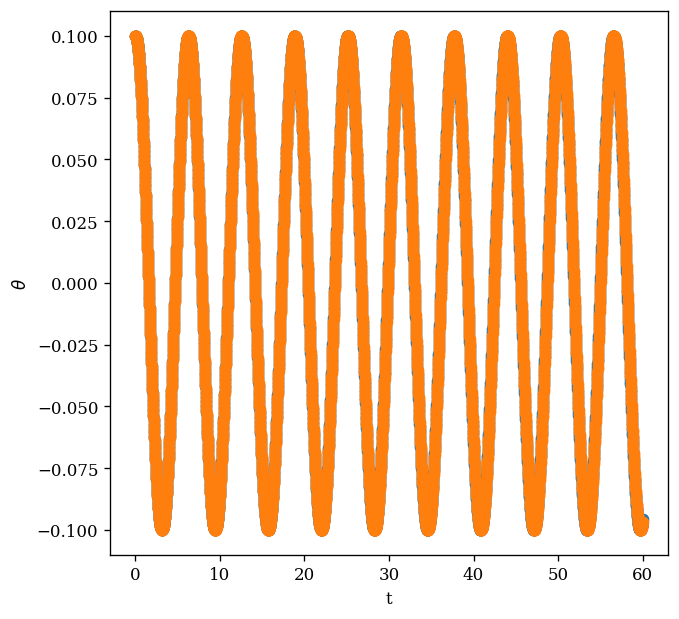

In [83]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family']  ='serif'
plt.rcParams['figure.facecolor'] = 'white'

g = 1 
l = 1

#_, ax = plt.subplots(3,3, figsize=(4,4))
_, ax = plt.subplots(1,1, figsize=(6,6))

#init_angles = np.linspace(0, 6, 9)


for angle in [.1]:#init_angles:

    thetas_phys = []
    thetas_harm = []
    theta_dots_phys = []
    theta_dots_harm = []
    ts = []

    theta_phys = angle
    theta_harm = angle
    theta_dot_phys = 0
    theta_dot_harm = 0

    sp_t = 5000 #number of time steps (spacing in time)
    end_t = 60
    
    for t in np.linspace(0, end_t, sp_t):
        
        theta_phys = theta_phys % (2*pi)
        if theta_phys > pi:
            theta_phys -= 2*pi
        
        theta_harm = theta_harm % (2*pi)
        if theta_harm > pi:
            theta_harm -= 2*pi
        #pretty plot
            
        
        ts.append(t)
        thetas_phys.append(theta_phys)
        thetas_harm.append(theta_harm)
        theta_dots_phys.append(theta_dot_phys)
        theta_dots_harm.append(theta_dot_harm)

        theta_phys = ( theta_phys + (end_t/sp_t) * theta_dot_phys )
        theta_harm = ( theta_harm + (end_t/sp_t) * theta_dot_harm )
                    
        theta_dot_phys = theta_dot_phys - (end_t/sp_t)*(g/l) * np.sin(theta_phys) #physical pendulum
        theta_dot_harm = theta_dot_harm - (end_t/sp_t)*(g/l)*theta_harm #harmonic oscillator
    ax.scatter(ts, thetas_harm)
    ax.scatter(ts, thetas_phys)
    ax.set_xlabel(r't'); ax.set_ylabel(r'$\theta$')
    

(theta=.1 rad)
Well, that's kind of boring, if I'm being honest. I can barely tell that there are two situations plotted here.

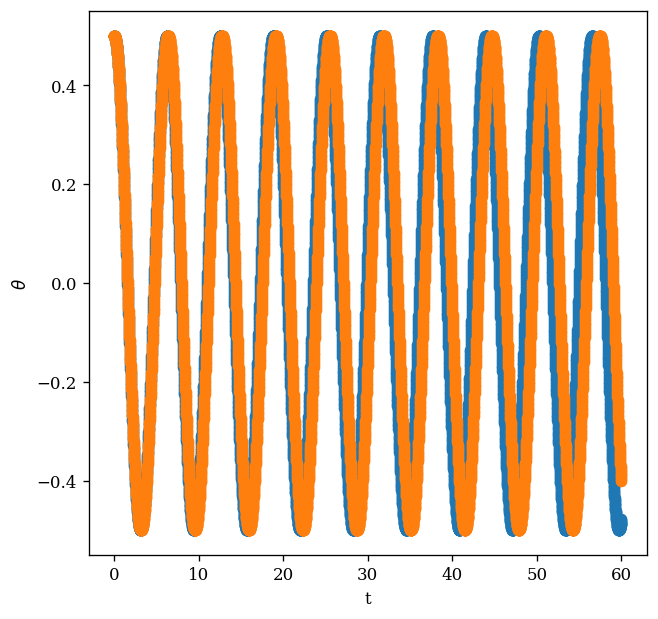

In [84]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family']  ='serif'
plt.rcParams['figure.facecolor'] = 'white'

g = 1 
l = 1

#_, ax = plt.subplots(3,3, figsize=(4,4))
_, ax = plt.subplots(1,1, figsize=(6,6))

#init_angles = np.linspace(0, 6, 9)


for angle in [.5]:#init_angles:

    thetas_phys = []
    thetas_harm = []
    theta_dots_phys = []
    theta_dots_harm = []
    ts = []

    theta_phys = angle
    theta_harm = angle
    theta_dot_phys = 0
    theta_dot_harm = 0

    sp_t = 5000 #number of time steps (spacing in time)
    end_t = 60
    
    for t in np.linspace(0, end_t, sp_t):
        
        theta_phys = theta_phys % (2*pi)
        if theta_phys > pi:
            theta_phys -= 2*pi
        
        theta_harm = theta_harm % (2*pi)
        if theta_harm > pi:
            theta_harm -= 2*pi
        #pretty plot
            
        
        ts.append(t)
        thetas_phys.append(theta_phys)
        thetas_harm.append(theta_harm)
        theta_dots_phys.append(theta_dot_phys)
        theta_dots_harm.append(theta_dot_harm)

        theta_phys = ( theta_phys + (end_t/sp_t) * theta_dot_phys )
        theta_harm = ( theta_harm + (end_t/sp_t) * theta_dot_harm )
                    
        theta_dot_phys = theta_dot_phys - (end_t/sp_t)*(g/l) * np.sin(theta_phys) #physical pendulum
        theta_dot_harm = theta_dot_harm - (end_t/sp_t)*(g/l)*theta_harm #harmonic oscillator
    ax.scatter(ts, thetas_harm)
    ax.scatter(ts, thetas_phys)
    ax.set_xlabel(r't'); ax.set_ylabel(r'$\theta$')
    

(theta=.5rad) I notice the harmonic oscillator (blue line) is noticeably departing from the physical pendulum (orange line) as time passes in this plot.

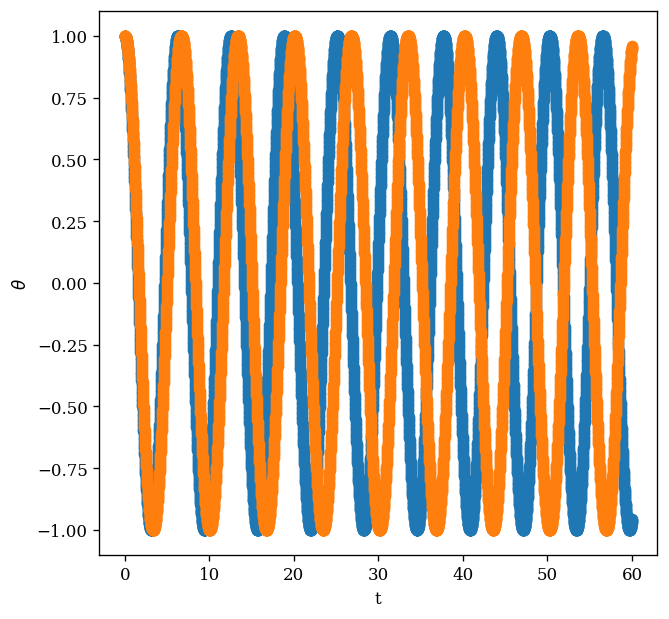

In [85]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family']  ='serif'
plt.rcParams['figure.facecolor'] = 'white'

g = 1 
l = 1

#_, ax = plt.subplots(3,3, figsize=(4,4))
_, ax = plt.subplots(1,1, figsize=(6,6))

#init_angles = np.linspace(0, 6, 9)


for angle in [1]:#init_angles:

    thetas_phys = []
    thetas_harm = []
    theta_dots_phys = []
    theta_dots_harm = []
    ts = []

    theta_phys = angle
    theta_harm = angle
    theta_dot_phys = 0
    theta_dot_harm = 0

    sp_t = 5000 #number of time steps (spacing in time)
    end_t = 60
    
    for t in np.linspace(0, end_t, sp_t):
        
        theta_phys = theta_phys % (2*pi)
        if theta_phys > pi:
            theta_phys -= 2*pi
        
        theta_harm = theta_harm % (2*pi)
        if theta_harm > pi:
            theta_harm -= 2*pi
        #pretty plot
            
        
        ts.append(t)
        thetas_phys.append(theta_phys)
        thetas_harm.append(theta_harm)
        theta_dots_phys.append(theta_dot_phys)
        theta_dots_harm.append(theta_dot_harm)

        theta_phys = ( theta_phys + (end_t/sp_t) * theta_dot_phys )
        theta_harm = ( theta_harm + (end_t/sp_t) * theta_dot_harm )
                    
        theta_dot_phys = theta_dot_phys - (end_t/sp_t)*(g/l) * np.sin(theta_phys) #physical pendulum
        theta_dot_harm = theta_dot_harm - (end_t/sp_t)*(g/l)*theta_harm #harmonic oscillator
    ax.scatter(ts, thetas_harm)
    ax.scatter(ts, thetas_phys)
    ax.set_xlabel(r't'); ax.set_ylabel(r'$\theta$')
    

Here the blue line is completely out of phase with the orange line within five wavelengths of the latter. This is initial angle 1 radian, so less than 30 degrees.

I think that's it for today.